In [1]:
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')


from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


In [4]:
import numpy as np, pandas as pd, seaborn as sns

In [5]:
df=pd.read_csv('aerofit_treadmill.csv')
df.head()

Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  Miles
0   KP281   18    Male         14        Single      3        4   29562    112
1   KP281   19    Male         15        Single      2        3   31836     75
2   KP281   19  Female         14     Partnered      4        3   30699     66
3   KP281   19    Male         12        Single      3        3   32973     85
4   KP281   20    Male         13     Partnered      4        2   35247     47

In [6]:
df.shape

(180, 9)

In [13]:
product = df["Product"]
product

0      KP281
1      KP281
2      KP281
3      KP281
4      KP281
       ...  
175    KP781
176    KP781
177    KP781
178    KP781
179    KP781
Name: Product, Length: 180, dtype: object

In [7]:
len(df)

180

In [8]:
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [9]:
for i in df.columns:
  print(i,':',df[i].nunique())

Product : 3
Age : 32
Gender : 2
Education : 8
MaritalStatus : 2
Usage : 6
Fitness : 5
Income : 62
Miles : 37


In [10]:
df.isnull().sum()
#No Missing Values

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [11]:
df['Product'].value_counts()

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

In [17]:
age = df["Age"]
age

0      18
1      19
2      19
3      19
4      20
       ..
175    40
176    42
177    45
178    47
179    48
Name: Age, Length: 180, dtype: int64

In [27]:
ms = df["MaritalStatus"]
ms


0         Single
1         Single
2      Partnered
3         Single
4      Partnered
         ...    
175       Single
176       Single
177       Single
178    Partnered
179    Partnered
Name: MaritalStatus, Length: 180, dtype: object

In [39]:
income = df["Income"]
income

0       29562
1       31836
2       30699
3       32973
4       35247
        ...  
175     83416
176     89641
177     90886
178    104581
179     95508
Name: Income, Length: 180, dtype: int64

In [43]:
df1 = pd.crosstab(product, ms)
df1

MaritalStatus  Partnered  Single
Product                         
KP281                 48      32
KP481                 36      24
KP781                 23      17

In [45]:
df2 = pd.crosstab(df['Product'], df['MaritalStatus'])
df2

MaritalStatus  Partnered  Single
Product                         
KP281                 48      32
KP481                 36      24
KP781                 23      17

In [51]:
df3 = pd.crosstab(df['Gender'], df['MaritalStatus'], values=df['Income'], aggfunc='mean')
df3

MaritalStatus     Partnered        Single
Gender                                   
Female         50693.760870  48502.800000
Male           59585.704918  52274.395349

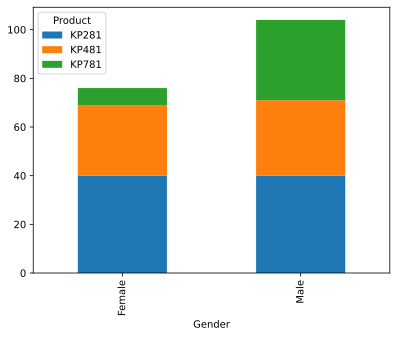

In [83]:
df4 = pd.crosstab(df['Gender'], df['Product'])
df4.plot(kind='bar', stacked=True)
plt.show()

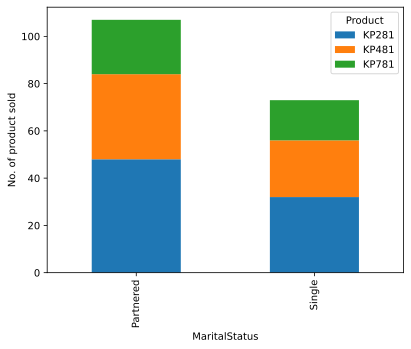

In [85]:
df5 = pd.crosstab(df['MaritalStatus'], df['Product'])
df5.plot(kind='bar', stacked=True)
plt.ylabel("No. of product sold")
plt.show()

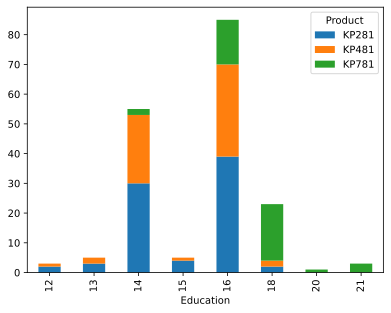

In [88]:
df6 = pd.crosstab(df['Education'], df['Product'])
df6.plot(kind='bar', stacked=True)
plt.show()

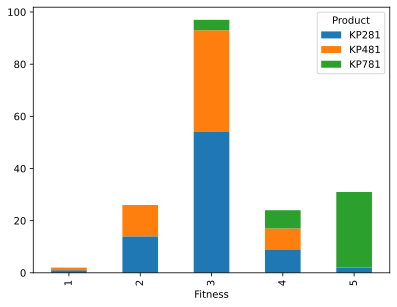

In [90]:
df7 = pd.crosstab(df['Fitness'], df['Product'])
df7.plot(kind='bar', stacked=True)
plt.show()

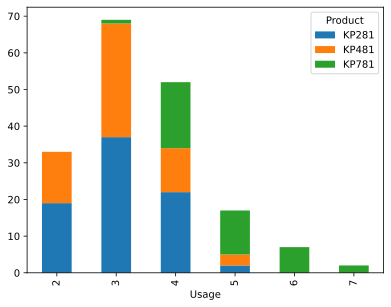

In [111]:
df8 = pd.crosstab(df['Usage'], df['Product'])
graph = df8.plot(kind='bar', stacked=True)
plt.show()

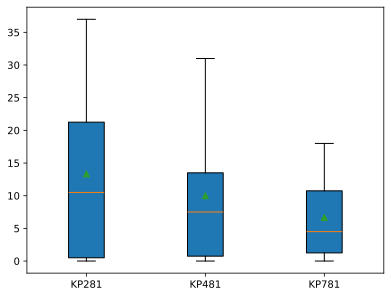

In [68]:
df9 = pd.crosstab(df['Usage'], df['Product'])
plt.boxplot(df9,labels= ["KP281","KP481","KP781"],patch_artist=True,showmeans= True)
plt.show()

In [108]:
df.describe()

Age   Education       Usage     Fitness         Income  \
count  180.000000  180.000000  180.000000  180.000000     180.000000   
mean    28.788889   15.572222    3.455556    3.311111   53719.577778   
std      6.943498    1.617055    1.084797    0.958869   16506.684226   
min     18.000000   12.000000    2.000000    1.000000   29562.000000   
25%     24.000000   14.000000    3.000000    3.000000   44058.750000   
50%     26.000000   16.000000    3.000000    3.000000   50596.500000   
75%     33.000000   16.000000    4.000000    4.000000   58668.000000   
max     50.000000   21.000000    7.000000    5.000000  104581.000000   

            Miles  
count  180.000000  
mean   103.194444  
std     51.863605  
min     21.000000  
25%     66.000000  
50%     94.000000  
75%    114.750000  
max    360.000000

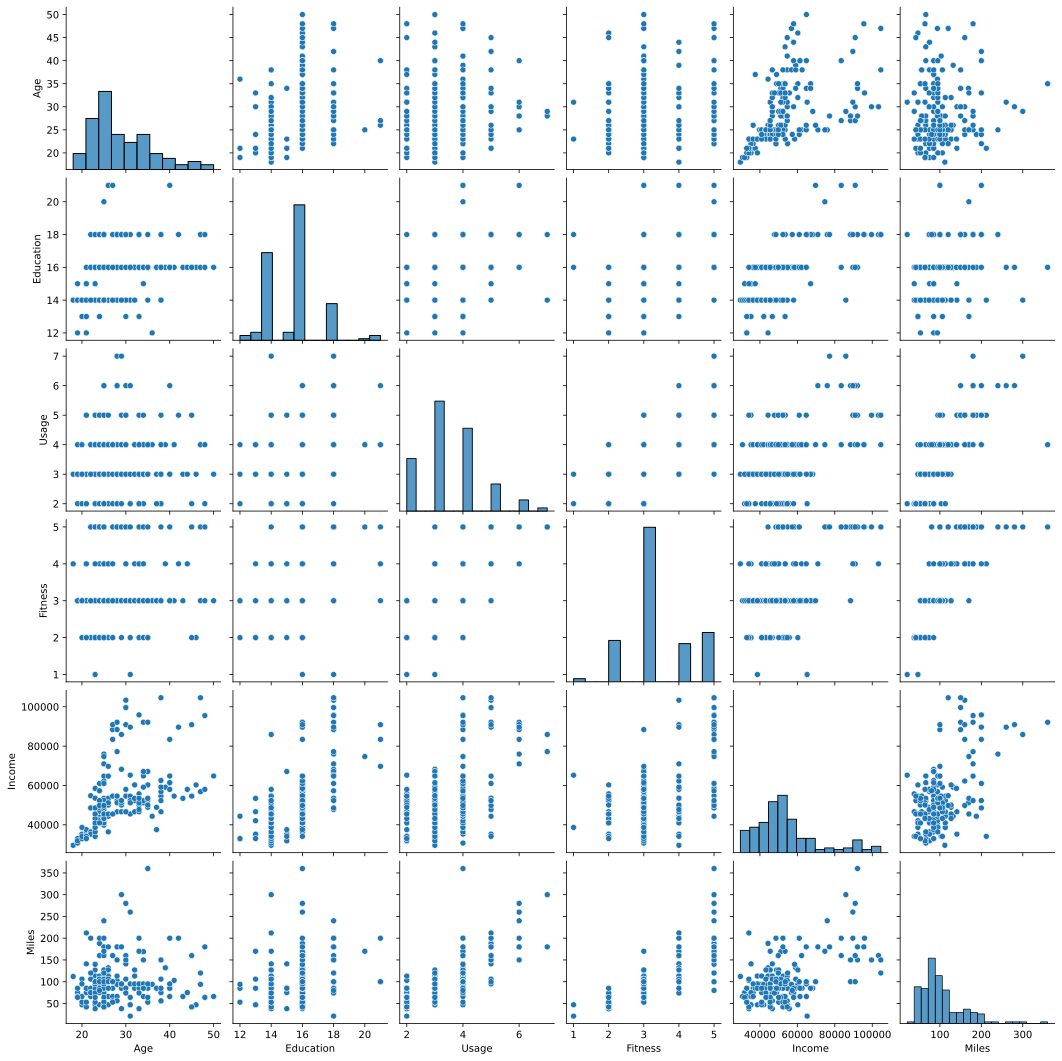

In [125]:
sns.pairplot(df)
plt.show()
#showing relations between all numerical columns

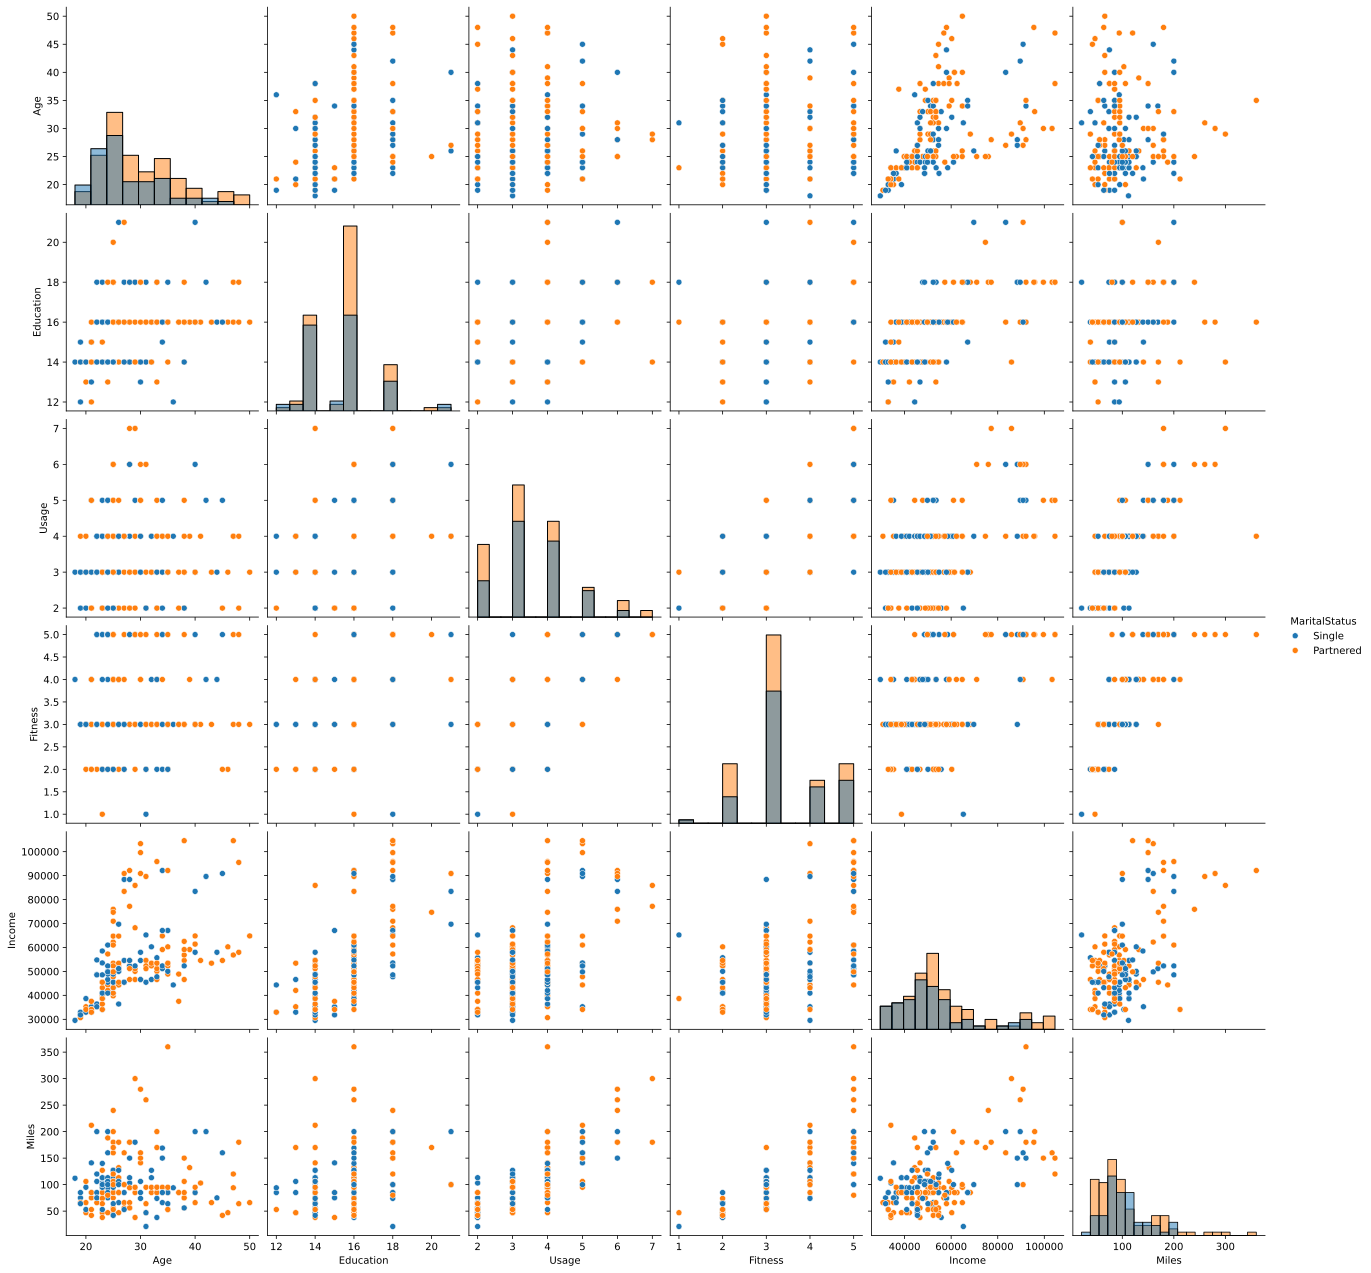

In [130]:
sns.pairplot(df,hue= "MaritalStatus",diag_kind="hist", height=3)
plt.show()

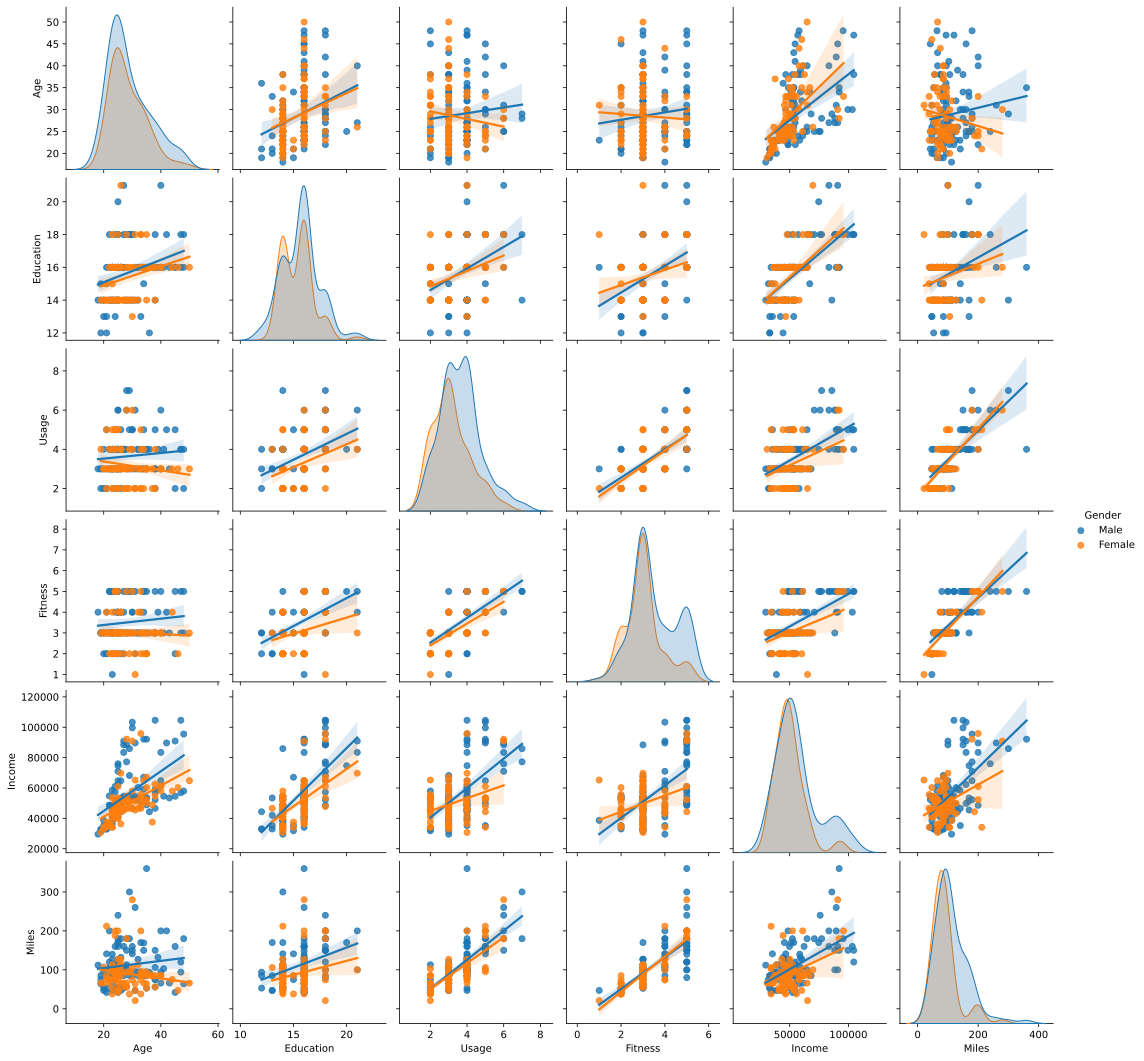

In [132]:
sns.pairplot(df,hue= "Gender",kind="reg")
plt.show()

In [135]:
df1_1 = pd.crosstab(product, ms,normalize="all")
df1_1

MaritalStatus  Partnered    Single
Product                           
KP281           0.266667  0.177778
KP481           0.200000  0.133333
KP781           0.127778  0.094444

In [136]:
df2_1 = pd.crosstab(df['Product'], df['MaritalStatus'],normalize="all")
df2_1

MaritalStatus  Partnered    Single
Product                           
KP281           0.266667  0.177778
KP481           0.200000  0.133333
KP781           0.127778  0.094444

In [138]:
df3_1 = pd.crosstab(df['Gender'], df['MaritalStatus'], values=df['Income'], aggfunc='mean',normalize="all")
df3_1

MaritalStatus  Partnered    Single
Gender                            
Female          0.240190  0.229809
Male            0.282321  0.247679

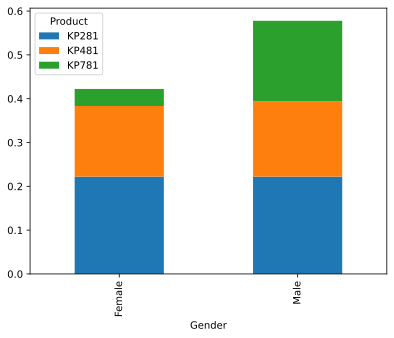

In [140]:
df4_1 = pd.crosstab(df['Gender'], df['Product'],normalize="all")
df4_1.plot(kind='bar', stacked=True)
plt.show()

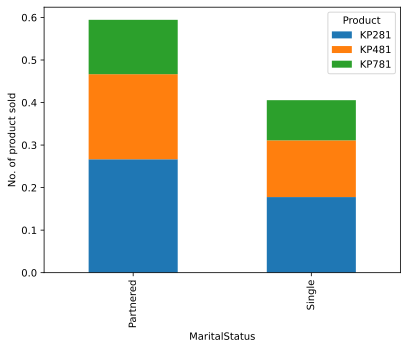

In [142]:
df5_1 = pd.crosstab(df['MaritalStatus'], df['Product'],normalize="all")
df5_1.plot(kind='bar', stacked=True)
plt.ylabel("No. of product sold")
plt.show()

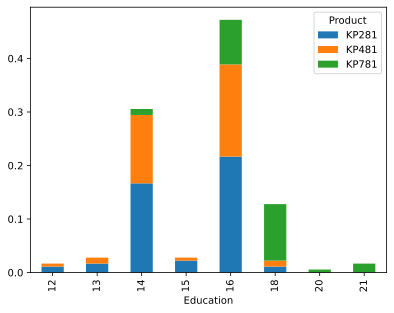

In [143]:
df6_1 = pd.crosstab(df['Education'], df['Product'],normalize="all")
df6_1.plot(kind='bar', stacked=True)
plt.show()

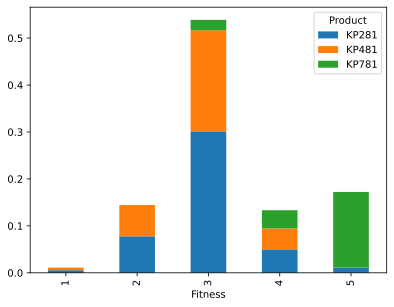

In [144]:
df7_1 = pd.crosstab(df['Fitness'], df['Product'],normalize="all")
df7_1.plot(kind='bar', stacked=True)
plt.show()

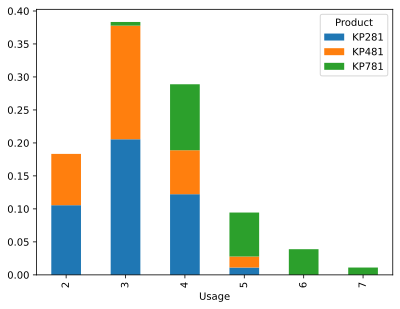

In [145]:
df8_1 = pd.crosstab(df['Usage'], df['Product'],normalize="all")
graph = df8_1.plot(kind='bar', stacked=True)
plt.show()

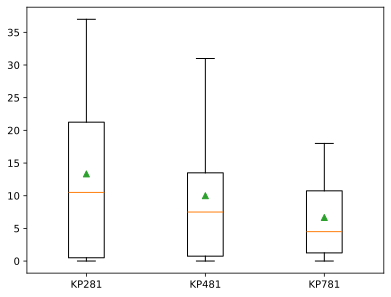

In [147]:
df9_1 = pd.crosstab(df['Usage'], df['Product'])
plt.boxplot(df9_1,labels= ["KP281","KP481","KP781"],showmeans= True)
plt.show()